## 1. 데이터 불러오기 

In [1]:
# 영화 데이터셋 
import pandas as pd
file_path = "data/movies.dat"
df2 = pd.read_csv(file_path, delimiter="::", engine="python", header=None,encoding="latin1")
df2.columns = ["MovieID", "Title", "Genres"]


In [2]:
# df2['Title'].apply(lambda x: x[-5:-1] if isinstance(x, str) else x).astype(int).value_counts().sort_index().tail(30)
df2

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


- 영화 기록 데이터 

In [3]:
# 영화기록 데이터 
import pandas as pd
file_path = "data/ratings.dat"
df = pd.read_csv(file_path, delimiter="::", engine="python", header=None,encoding="latin1")
df.columns = ["UserId", "MovieID", "Ratings","timestamp"]


In [4]:
new_df=df.merge(df2, on='MovieID')
new_df= new_df.sort_values(by=['UserId', 'timestamp'])


In [5]:
new_df['movie_explain'] = (
    new_df['MovieID'].astype(str) +  # MovieID를 문자열로 변환
    ' (' + new_df['Genres'] + ') ' +
    'ratings: ' + new_df['Ratings'].astype(str)
)

df_sorted= new_df.sort_values(by=['UserId', 'timestamp'])

In [7]:
new__test_df= new_df.groupby('UserId').tail(1)
real_df = new_df.drop(new__test_df.index)
real_df.to_csv('data/real_df.csv', index=False)

,UserId,MovieID,Ratings,timestamp,Title,Genres,movie_explain
31,1,3186,4,978300019,"Girl, Interrupted (1999)",Drama,3186 (Drama) ratings: 4
22,1,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi,1270 (Comedy|Sci-Fi) ratings: 5
27,1,1721,4,978300055,Titanic (1997),Drama|Romance,1721 (Drama|Romance) ratings: 4
37,1,1022,5,978300055,Cinderella (1950),Animation|Children's|Musical,1022 (Animation|Children's|Musical) ratings: 5
24,1,2340,3,978300103,Meet Joe Black (1998),Romance,2340 (Romance) ratings: 3
...,...,...,...,...,...,...,...
1000019,6040,2917,4,997454429,Body Heat (1981),Crime|Thriller,2917 (Crime|Thriller) ratings: 4
999988,6040,1921,4,997454464,Pi (1998),Sci-Fi|Thriller,1921 (Sci-Fi|Thriller) ratings: 4
1000172,6040,1784,3,997454464,As Good As It Gets (1997),Comedy|Drama,1784 (Comedy|Drama) ratings: 3
1000167,6040,161,3,997454486,Crimson Tide (1995),Drama|Thriller|War,161 (Drama|Thriller|War) ratings: 3


In [8]:
test_df=df_sorted.groupby('UserId').tail(1)
train_df = df_sorted.drop(test_df.index)
train_df


,UserId,MovieID,Ratings,timestamp,Title,Genres,movie_explain
31,1,3186,4,978300019,"Girl, Interrupted (1999)",Drama,3186 (Drama) ratings: 4
22,1,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi,1270 (Comedy|Sci-Fi) ratings: 5
27,1,1721,4,978300055,Titanic (1997),Drama|Romance,1721 (Drama|Romance) ratings: 4
37,1,1022,5,978300055,Cinderella (1950),Animation|Children's|Musical,1022 (Animation|Children's|Musical) ratings: 5
24,1,2340,3,978300103,Meet Joe Black (1998),Romance,2340 (Romance) ratings: 3
...,...,...,...,...,...,...,...
999923,6040,232,5,997454398,Eat Drink Man Woman (1994),Comedy|Drama,232 (Comedy|Drama) ratings: 5
1000019,6040,2917,4,997454429,Body Heat (1981),Crime|Thriller,2917 (Crime|Thriller) ratings: 4
999988,6040,1921,4,997454464,Pi (1998),Sci-Fi|Thriller,1921 (Sci-Fi|Thriller) ratings: 4
1000172,6040,1784,3,997454464,As Good As It Gets (1997),Comedy|Drama,1784 (Comedy|Drama) ratings: 3


In [23]:
df_sorted['movie_explain'].str.len().mean()


32.369974675292866

In [9]:
train_df_group = train_df.groupby('UserId')['movie_explain'].apply(list).reset_index()
test_df_group= test_df.groupby('UserId')['movie_explain'].apply(list).reset_index()

- 최종 데이터프레임 

In [35]:
df_sorted.query('UserId==2').tail(10)

,UserId,MovieID,Ratings,timestamp,Title,Genres,movie_explain
92,2,3257,3,978300073,"Bodyguard, The (1992)",Action|Drama|Romance|Thriller,3257 (Action|Drama|Romance|Thriller) ratings: 3
129,2,736,4,978300100,Twister (1996),Action|Adventure|Romance|Thriller,736 (Action|Adventure|Romance|Thriller) rating...
167,2,2002,5,978300100,Lethal Weapon 3 (1992),Action|Comedy|Crime|Drama,2002 (Action|Comedy|Crime|Drama) ratings: 5
74,2,2126,3,978300123,Snake Eyes (1998),Action|Crime|Mystery|Thriller,2126 (Action|Crime|Mystery|Thriller) ratings: 3
80,2,292,3,978300123,Outbreak (1995),Action|Drama|Thriller,292 (Action|Drama|Thriller) ratings: 3
133,2,95,2,978300143,Broken Arrow (1996),Action|Thriller,95 (Action|Thriller) ratings: 2
66,2,1687,3,978300174,"Jackal, The (1997)",Action|Thriller,1687 (Action|Thriller) ratings: 3
73,2,434,2,978300174,Cliffhanger (1993),Action|Adventure|Crime,434 (Action|Adventure|Crime) ratings: 2
87,2,1544,4,978300174,"Lost World: Jurassic Park, The (1997)",Action|Adventure|Sci-Fi|Thriller,1544 (Action|Adventure|Sci-Fi|Thriller) rating...
136,2,1917,3,978300174,Armageddon (1998),Action|Adventure|Sci-Fi|Thriller,1917 (Action|Adventure|Sci-Fi|Thriller) rating...


In [26]:
test_df_group.to_csv('data/test_movie.csv', index=False)
train_df_group.to_csv('data/train_movie.csv', index=False)

## 데이터 탐색

In [46]:
# 사용자별 데이터 크기 확인
train_df_group['interaction_count'] = train_df_group['movie_explain'].apply(len)


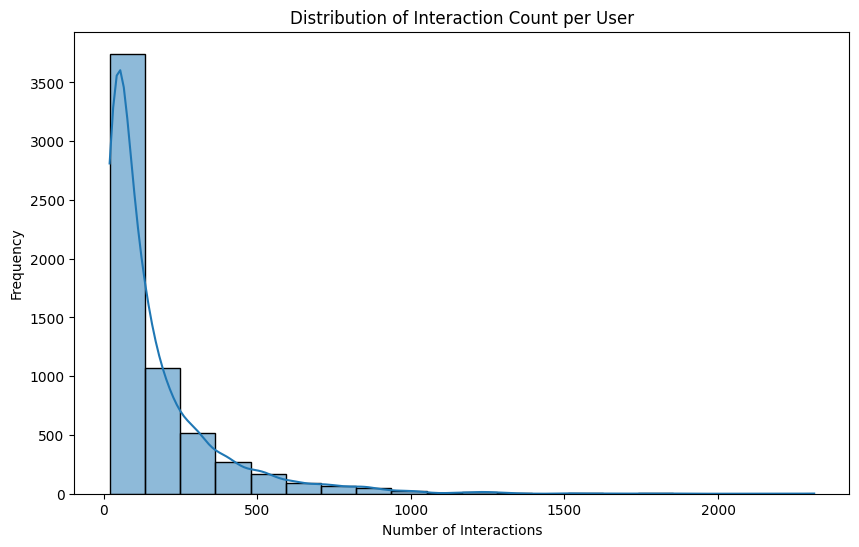

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사용자별 상호작용 횟수 시각화
plt.figure(figsize=(10, 6))
sns.histplot(train_df_group['interaction_count'], kde=True, bins=20)
plt.title('Distribution of Interaction Count per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()


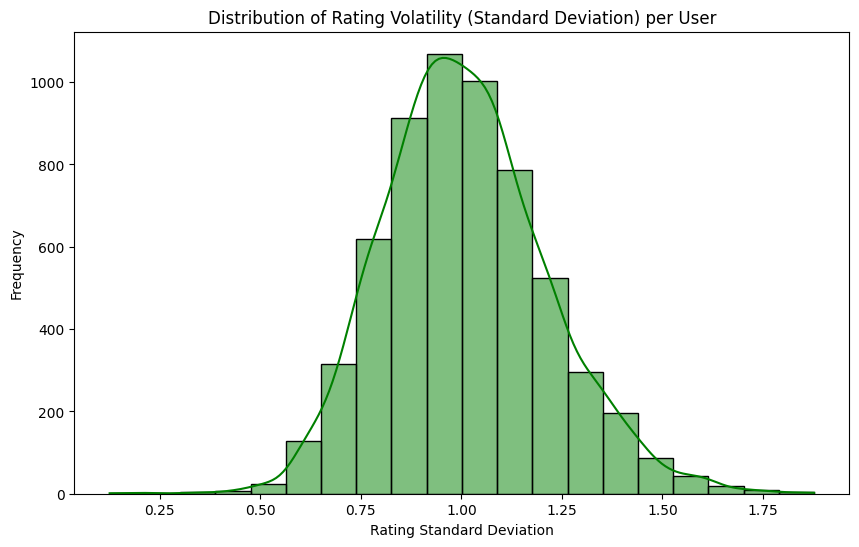

In [50]:
# 사용자별 평점 리스트 생성
train_df_group['rating_list'] = train_df_group['movie_explain'].apply(
    lambda x: [int(item.split('ratings: ')[1]) for item in x]
)
# 사용자별 평점 표준편차 계산
train_df_group['rating_std'] = train_df_group['rating_list'].apply(lambda x: pd.Series(x).std())

# 평점 변동성 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_df_group['rating_std'], kde=True, bins=20, color='green')
plt.title('Distribution of Rating Volatility (Standard Deviation) per User')
plt.xlabel('Rating Standard Deviation')
plt.ylabel('Frequency')
plt.show()
# 사용자별로 평점을 잘 주는 사람, 깐깐한 사람이 있는 것처럼 정규분포 형태를 띈다. 